Name: plot_ccpa.ipynb

Author: Robert M. Frost

NOAA Global Systems Laboratory

Created: 24 July 2023

Purpose: Plot precipitation observations from ccpa data

In [79]:
import matplotlib.pyplot as plt
from matplotlib import rc
import cartopy.crs as ccrs
import cartopy.feature as cpf
import numpy as np
import geopandas as gpd
import seaborn
import matplotlib.colors as mcolors
import xarray as xr

Important parameters

In [80]:
# directory where hrrr grib data are located
dgrib1 = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041912_3km_hrrrphys/obs/ccpa/proc/20230419/"
dgrib2 = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2023041912_3km_hrrrphys/obs/ccpa/proc/20230420/"
# directory for figure to be output
figdir = "/scratch2/BMC/fv3lam/Robby.Frost/figures/2023041912/ccpa/"

Read in precip

In [81]:
# create list to store precip data
ccpa_all = []
# list of hours
hr1 = np.arange(13,24,1)
hr2 = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
# loop over hours
for hr in range(hr1.size):
    ccpa = xr.open_dataarray(f"{dgrib1}ccpa.t{hr1[hr]}z.01h.hrap.conus.gb2", engine="cfgrib")
    # append to list
    ccpa_all.append(ccpa)

# loop over hours
for hr in range(len(hr2)):
        ccpa = xr.open_dataarray(f"{dgrib2}ccpa.t{hr2[hr]}z.01h.hrap.conus.gb2", engine="cfgrib")
        # append to list
        ccpa_all.append(ccpa)

In [82]:
lat = ccpa.latitude
lon = ccpa.longitude

Sum over all hours

In [83]:
ccpa_sum = np.empty((ccpa.y.size, ccpa.x.size))
# loop over hours
for hr in range(len(ccpa_all)):
    if hr == 0:
        ccpa_sum = ccpa_all[hr]
    else:
        ccpa_sum = ccpa_sum + ccpa_all[hr]

In [84]:
# plotting setup
rc('font',weight='normal',size=12.5)
# rc('text',usetex='True')
rc('figure',facecolor='white')

In [85]:
# custom colorbar using NWS precip accumulation
nws_precip_colors = [
    "#fdfdfd",
    "#a9f5f4",
    "#33aff2",
    "#0300f4",
    "#02fd02",
    "#01c501",
    "#008e00",
    "#fdf802",
    "#e5bc00",
    "#fd9500",
    "#fd0000",
    "#d40000",
    "#bc0000",
    "#f800fd",
    "#9854c6",
    "#fdfdfd" 
]

Plot precip accumulation in Oklahoma

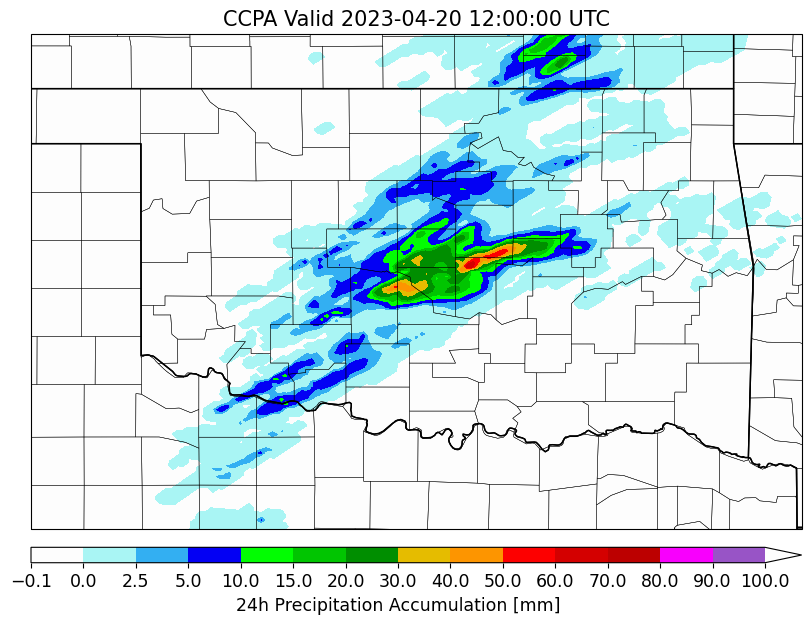

In [94]:
# set colorbar
colors = mcolors.ListedColormap(nws_precip_colors)
# custom colorbar values
clevs = [-0.1, 0.0, 2.5, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# normalize colors around clevs
norm = mcolors.BoundaryNorm(clevs, 16)

# create plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(8,6.2), constrained_layout=True)

# plot CCPA
c0 = ax.contourf(lon, lat, ccpa_sum, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors, norm=norm, extend="max")

# mapping
plt_area = [-101, -94, 33, 37.5] # W, E, S, N
ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)
ax.set_extent(plt_area)
# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
geoData.plot(ax=ax, color="none", lw=0.3, aspect=1)

# set title
ax.set_title(f"CCPA Valid 2023-04-20 12:00:00 UTC")

# Add colorbar
cbar = fig.colorbar(c1, ax=ax, orientation='horizontal', extend=True, pad=0.03, aspect=50)
cbar.set_label('24h Precipitation Accumulation [mm]')
cbar.set_ticks(clevs)

# save and close figure
plt.savefig(f"{figdir}precip_OK.png")
plt.show()
plt.close()